<html><font size=6><B>3η εργαστηριακή άσκηση</B><BR>
    <BR><B>Link prediction - Πρόβλεψη συνδέσμων</B></BR>
    </font></html>

### Μπάρμπα Παναγίωτα Νικολέττα 
### ΑΜ: 03118604

<html><font size=4><B>1. Κατασκευή γράφου και προεργασία για την πρόβλεψη συνδέσμων</B></font>
    <li><B>1(i).</B> Χρησιμοποιήστε το dataset <a href="http://konect.cc/networks/dbpedia-similar/"> Similarities (DBpedia)</a>, για να κατασκευάσετε τον μη κατευθυνόμενο (undirected) γράφο $G$ <a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]</a>,<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]</a>. Οι κόμβοι του γράφου αναπαριστούν σελίδες της Wikipedia και οι ακμές σχέση ομοιότητας μεταξύ τους. Στην σελίδα <a href="http://konect.cc/networks/dbpedia-similar/"> KONECT (DBpedia)</a> μπορείτε να βρείτε πληροφορίες για τις ιδιότητες του γράφου.</a><BR>
        <B><U>Υπόδειξη:</U></B> Μπορείτε να ελέγξετε προγραμματιστικά αν το dataset περιέχει διπλότυπα των ακμών με την ίδια ή αντίστροφη σειρά (π.χ. ακμές (a,b) και (b,a)), και να λάβετε υπ' όψιν σας αυτήν σας την παρατήρηση, όπου τυχόν χρειαστεί, στην ερώτηση 2.<BR></html>

In [2]:
import networkx as nx

#στο README file βλέπουμε ότι το αρχείο περιέχει τον πίνακα γειτνίασης του δικτύου
# στην μορφή "ID of from node" "ID of to node"  με μία ακμή ανά γραμμή
# διαβάζουμε τον γράφο με την εντολή nx.read_adjlist

DBpedia = nx.read_adjlist("./dbpedia-similar/out.dbpedia-similar", comments='%',nodetype=int)

edges = set()

for n in DBpedia.edges():
    if ((n[1], n[0]) not in edges) and ((n[0], n[1]) not in edges):
        edges.add(n)
    else:
        print("Duplicate edge: ", n)
if len(edges) == DBpedia.number_of_edges():
    print("No duplicate edges")   


No duplicate edges


 <li><B>1(ii).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G$.</li><BR>

In [106]:
import numpy as np

initial_node_count = DBpedia.number_of_nodes()
initial_edge_count = DBpedia.number_of_edges()
initial_average_degree = round(np.mean(list(dict(DBpedia.degree()).values())),3) 
initial_connected_components = nx.number_connected_components(DBpedia)

print("Initial number of nodes: ", initial_node_count,
    "\nInitial number of edges: ", initial_edge_count,
    "\nInitial average degree: ", initial_average_degree,
    "\nInitial number of connected components: ", initial_connected_components)

Initial number of nodes:  430 
Initial number of edges:  565 
Initial average degree:  2.628 
Initial number of connected components:  95


<li><B>1(iii). </B>Υπολογίστε το σύνολο των ασύνδετων ζευγών κόμβων (unconnected pairs) στον γράφο χρησιμοποιώντας τον πίνακα γειτνίασης (adjacency matrix). Δώστε επίσης τον αριθμό τους. Λάβετε υπ' όψιν σας ότι ο γράφος είναι μη κατευθυνόμενος και δεν χρειάζεται να διατρέξετε ολόκληρο τον πίνακα γειτνίασης.</li><BR>

In [4]:
unconnected_edges = list(nx.non_edges(DBpedia))
print("Number of unconnected edges: ", len(unconnected_edges))
print("Some unconnected edges: ", unconnected_edges[:10], "...", unconnected_edges[-10:])

Number of unconnected edges:  91671
Some unconnected edges:  [(1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15)] ... [(425, 428), (425, 429), (425, 430), (426, 428), (426, 429), (426, 430), (427, 428), (427, 429), (427, 430), (429, 430)]


<li><B>1(iv).</B> Υπολογίστε το σύνολο των ακμών (removable edges) που μπορούν να αφαιρεθούν από τον γράφο χωρίς να υπάρχει κατάτμηση (splitting) του γράφου (δηλ. ο αριθμός των συνεκτικών συνιστωσών θα πρέπει να παραμένει αμετάβλητος). Υπόδειξη: Ελέγχετε επίσης ότι με αφαίρεση ακμής δεν μειώνεται ο αριθμός των κόμβων (εφόσον δεν υπάρχει ξεχωριστό αρχείο μόνο με κόμβους στο dataset). Δώστε επίσης τον αριθμό των ακμών (removable edges) που μπορούν να αφαιρεθούν υπό αυτές τις προϋποθέσεις.</li><BR>

In [47]:
# removable edges: check splitting and number of nodes
def removableEdges(graph):
    removable_edges = []
    rem_graph = graph.copy()
    for edge in graph.edges():
        rem_graph.remove_edge(edge[0], edge[1])
        rem_nodes = rem_graph.number_of_nodes()
        rem_connected = nx.number_connected_components(rem_graph)
        if ( rem_connected == initial_connected_components) and ( rem_nodes == initial_node_count and edge[0] != edge[1]): 
            removable_edges.append(edge)
        else:
            rem_graph.add_edge(edge[0], edge[1])
    return removable_edges


removable_edges = removableEdges(DBpedia)
print("Number of removable edges: ", len(removable_edges))
print("Some removable edges: ", removable_edges[:10], "...", removable_edges[-10:])

Number of removable edges:  229
Some removable edges:  [(1, 2), (1, 3), (1, 4), (3, 4), (3, 5), (5, 6), (5, 46), (5, 47), (32, 20), (32, 21)] ... [(400, 401), (400, 402), (400, 403), (400, 404), (401, 402), (401, 403), (401, 404), (402, 403), (402, 404), (403, 404)]


<li><B>1(vα).</B> Κατασκευάστε dataframe που συνενώνει τις απαντήσεις των ερωτημάτων 1(iii) και 1(iv) (unconnected+removables). Χρησιμοποιήστε την μεταβλητή $link$ που θα παίρνει τιμή 1 ή 0 ανάλογα με την ύπαρξη συνδέσμου ή μη. To dataframe αυτό συγκεντρώνει τα θετικά και αρνητικά δείγματα για την πρόβλεψη των μελλοντικών συνδέσεων (link: target variable). <BR>
    <li><B>1(vβ).</B> Κατασκευάστε τον γράφο $G'$ που προκύπτει από την αφαίρεση από τον γράφο $G$ των ακμών του ερωτήματος 1(iv). <BR>
    <li><B>1(vγ).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G'$.</li><BR>

In [105]:
import pandas as pd
from tabulate import tabulate
#dataframe of unconnected node pairs (they will function as negative samples)
#...['link'] = 0 # uncomment and complete
#dataframe of removable edges (they will function as positive samples)
#...['link'] = 1  #uncomment and complete
df_unconnected = pd.DataFrame({'edge': unconnected_edges, 'link': 0.0})
df_removable = pd.DataFrame({'edge': removable_edges, 'link': 1.0})
#merge in one dataframe
df_merged = pd.concat([df_unconnected, df_removable], ignore_index=True)
print(tabulate(df_merged.sort_values(by=['edge']).head(10), headers='keys', tablefmt='psql'))


#build graph G'=G_reduced
G_reduced = DBpedia.copy()
G_reduced.remove_edges_from(removable_edges)

node_count = G_reduced.number_of_nodes()
edge_count = G_reduced.number_of_edges()
average_degree = round(np.mean(list(dict(G_reduced.degree()).values())),3) 
connected_components = nx.number_connected_components(G_reduced)

print("Number of nodes: ", node_count,
    "\nNumber of edges: ", edge_count,
    "\nAverage degree: ", average_degree,
    "\nNumber of connected components: ", connected_components)

+-------+---------+--------+
|       | edge    |   link |
|-------+---------+--------|
| 91671 | (1, 2)  |      1 |
| 91672 | (1, 3)  |      1 |
| 91673 | (1, 4)  |      1 |
|     0 | (1, 6)  |      0 |
|     1 | (1, 7)  |      0 |
|     2 | (1, 8)  |      0 |
|     3 | (1, 9)  |      0 |
|     4 | (1, 10) |      0 |
|     5 | (1, 11) |      0 |
|     6 | (1, 12) |      0 |
+-------+---------+--------+
Number of nodes:  430 
Number of edges:  336 
Average degree:  1.563 
Number of connected components:  95


### 2. Εισαγωγή σε similarity-based μετρικές για Link prediction

- Η μετρική **Jaccard Coefficient (JC)** των κόμβων ${u}$ και ${v}$ ορίζεται ως $\frac{|\Gamma(u) \cap \Gamma(v)|}{|\Gamma(u) \cup \Gamma(v)|}$, όπου ${\Gamma(u)}$ είναι το σύνολο των γειτονικών κόμβων του κόμβου ${u}$.

- Η μετρική **Preferential Αttachment (PA)** των κόμβων $u$ και $v$ ορίζεται ως $|\Gamma(u)| |\Gamma(v)|$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.
-  Η μετρική **Resource Allocation (RA)** των κόμβων $u$ και $v$ ορίζεται ως $\sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{1}{|\Gamma(w)|}$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.<BR><BR>

**<u>Υπόδειξεις για παρακάτω:</u>**
1. Θετικό θεωρήστε ένα αποτέλεσμα, αν η μετρική $JC$ υπερβαίνει μια τιμή κατωφλίου (>=). Αρνητικό θεωρήστε το στην αντίθετη περίπτωση.
2. Αληθώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά (η τιμή της $JC$ υπερβαίνει την τιμή κατωφλίου) και πράγματι θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iv)).
3. Αληθώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά και πράγματι δεν θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iii)).
3. Ψευδώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά, ενώ δεν θα υπάρξουν οι συνδέσεις που περιγράφουν.
4. Ψευδώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά, ενώ θα υπάρξουν οι συνδέσεις που περιγράφουν.
5. Το άθροισμα $TN+FP$ πρέπει κάθε φορά να σας δίνει όλες τις ασύνδετες ακμές του γράφου $G$.
6. Από το ερώτημα 1(iii) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες δεν θα υπάρξουν συνδέσεις. - Από το ερώτημα 1(iv) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες θα υπάρξουν συνδέσεις.<BR>

- **2(i).** Για τον γράφο $G'$, που κατασκευάσατε στο ερώτημα 1(vβ), υπολογίστε την μετρική **Jaccard Coefficient (JC)**.  <u><a href="https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html?highlight=link%20prediction">Χρησιμοποιήστε την υλοποιημένη συνάρτηση του λογισμικού NetworkX.</a></u> <BR></BR>


In [90]:

JC_preds = [(u,v,p) for (u,v,p) in nx.algorithms.link_prediction.jaccard_coefficient(G_reduced)]
#check if all p are 1.0
#print("All Jaccard Coefficient predictions are 1.0: ", all((x[2] == 1.0 or x[2]==0.0) for x in JC_preds))
print(JC_preds[:10], "...", JC_preds[-10:])

[(1, 2, 0.0), (1, 3, 0.0), (1, 4, 0.0), (1, 6, 0.0), (1, 7, 0.0), (1, 8, 0.0), (1, 9, 0.0), (1, 10, 0.0), (1, 11, 0.0), (1, 12, 0.0)] ... [(425, 428, 0.0), (425, 429, 0.0), (425, 430, 0.0), (426, 428, 0.0), (426, 429, 0.0), (426, 430, 0.0), (427, 428, 0.0), (427, 429, 0.0), (427, 430, 0.0), (429, 430, 1.0)]


- **2(ii).** Δώστε τις $k$ ακμές με την υψηλότερη τιμή μετρικής $JC$, όπου $k$ ο $Α.Μ.$ σας $mod$ $10$. Για $Α.Μ.$ λήγοντα σε $0$ δώστε τις $10$ ακμές με την υψηλότερη τιμή μετρικής.
        (Για την σύγκριση μεταξύ διαφορετικών μετρικών προτιμάται η εύρεση των $k$ επικρατέστερων συνδέσμων, αφού οι μετρικές επιστρέφουν διαφορετικό εύρος τιμών.)<BR>


In [111]:
# k = 18604 mod 10 = 4
# find the 4 highest scores

JC_sorted = sorted(JC_preds, key=lambda x: x[2], reverse=True) 
print("Top 4 Jaccard Coefficient predictions:")
print(tabulate(JC_sorted[:4], headers=["u","v","p"], tablefmt='psql'))
# # hold the non-zero min 
min_nonzero = []
#tmp = 1.0
#cnt = 0
for i in JC_sorted:
    if i[2] != 0.0 and i[2] != 1.0:#i[2] < tmp:
        min_nonzero.append(i[2])
        #tmp = i[2]

print("Min non-zero Jaccard Coefficient: ", min_nonzero)

Top 4 Jaccard Coefficient predictions:
+-----+-----+-----+
|   u |   v |   p |
|-----+-----+-----|
|   4 |  46 |   1 |
|   4 |  47 |   1 |
|   4 |  49 |   1 |
|  23 |  34 |   1 |
+-----+-----+-----+
Min non-zero Jaccard Coefficient:  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.333

- **2(iii).** Προσδιορίστε για την μέτρηση της απόδοσης της μετρικής $JC$ τα μεγέθη $Precision$, $Recall$ και $Accuracy$ και αναπαραστήστε τα γραφικά για τιμές κατωφλίου: $0.1$, $0.15$, $0.25$, $0.5$, $1.0$.  <BR></BR>
    $Precision=\frac{TP}{TP+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα </BR>
    $Recall=\frac{TP}{TP+FN}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα 
    $Accuracy=\frac{TP+TN}{TP+FN+TN+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $TN$: αληθώς αρνητικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα<BR></BR>

Threshold:  0.1 
	Recall:  0.013100436681222707 
	Precision:  0.005940594059405941 
	Accuracy:  0.9920783460282916
Threshold:  0.15 
	Recall:  0.013100436681222707 
	Precision:  0.006160164271047228 
	Accuracy:  0.9922742110990207
Threshold:  0.25 
	Recall:  0.013100436681222707 
	Precision:  0.006696428571428571 
	Accuracy:  0.9926985854189336
Threshold:  0.5 
	Recall:  0.013100436681222707 
	Precision:  0.00906344410876133 
	Accuracy:  0.9939717083786724
Threshold:  1.0 
	Recall:  0.013100436681222707 
	Precision:  0.012145748987854251 
	Accuracy:  0.9948857453754081


Text(0.5, 1.0, 'Accuracy')

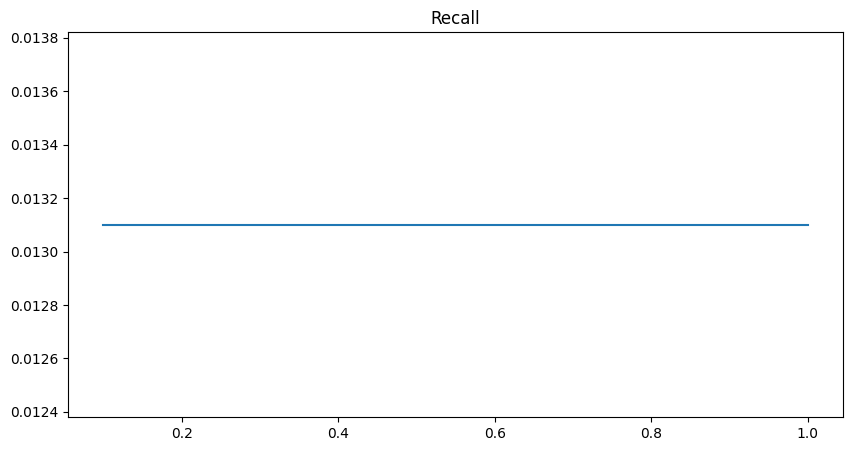

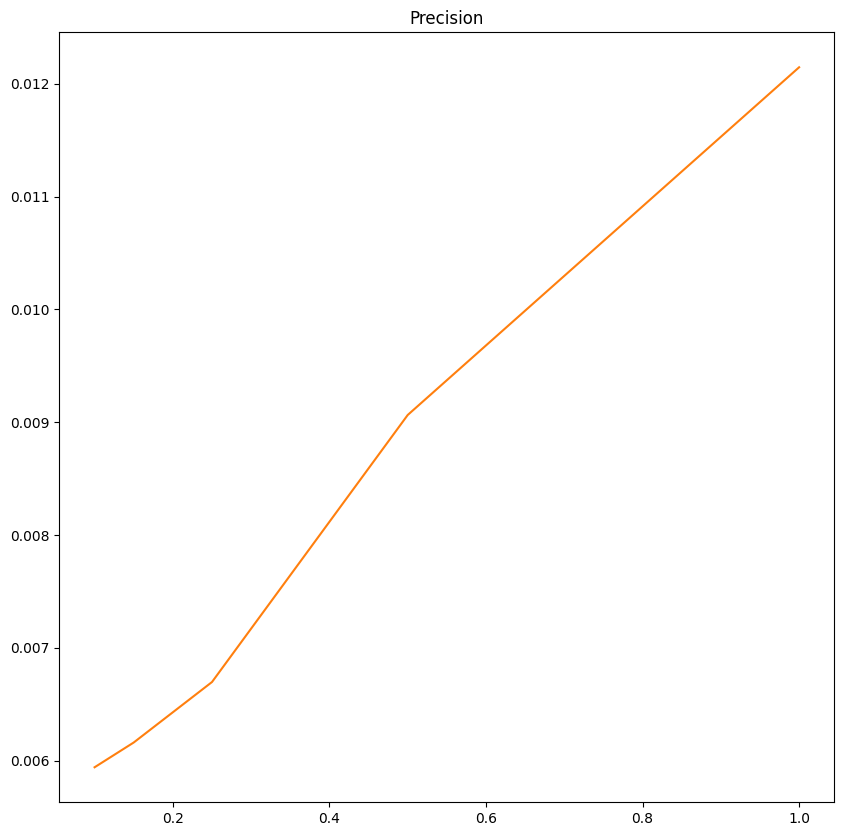

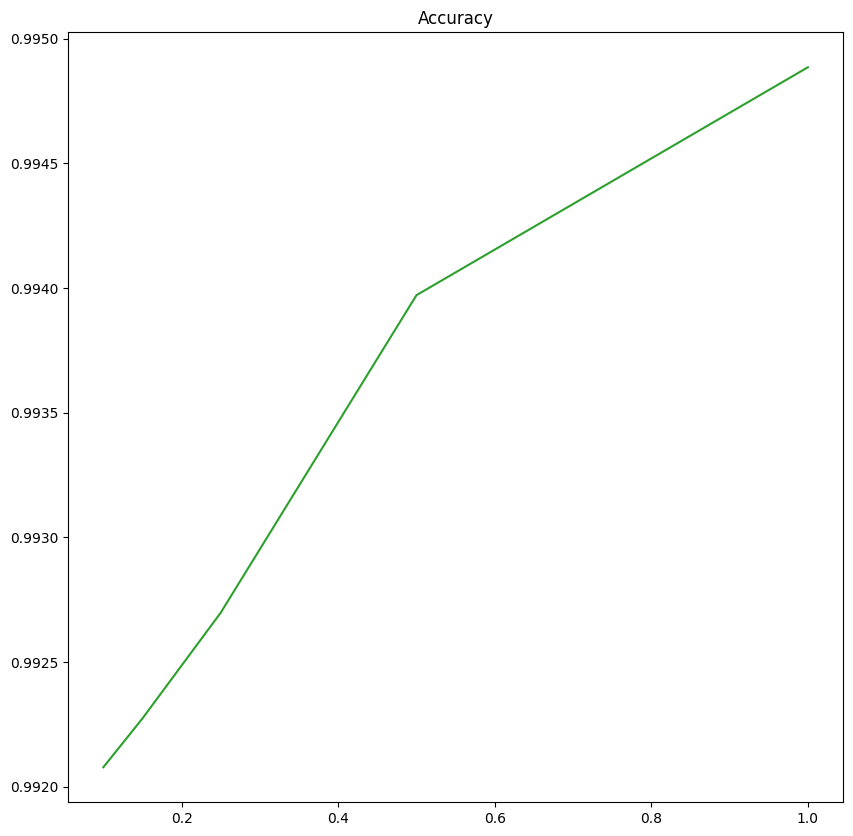

In [110]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def JCfunction(threshold,vals_pred, actual_vals):
    pred = np.where( vals_pred >= threshold, 1.0, 0.0)
    recall_jc = recall_score(actual_vals , pred)
    precision_jc = precision_score(actual_vals , pred)
    accuracy_jc = accuracy_score(actual_vals , pred)
    return recall_jc, precision_jc, accuracy_jc


threshold_jc = [0.1,0.15,0.25,0.5,1.0]
JC_vals = np.array([x[2] for x in JC_preds])
links = list(df_merged['link'])
results = []
for t in threshold_jc:
    recall_jc, precision_jc, accuracy_jc = JCfunction(t,JC_vals,links)
    results.append((t,recall_jc,precision_jc,accuracy_jc))
    print("Threshold: ", t, "\n\tRecall: ", recall_jc, "\n\tPrecision: ", precision_jc, "\n\tAccuracy: ", accuracy_jc)


plt.figure(1,figsize=(10,5))
plt.plot([x[0] for x in results], [x[1] for x in results], 'tab:blue')
plt.title('Recall')

plt.figure(2,figsize=(10,10))
plt.plot([x[0] for x in results], [x[2] for x in results], 'tab:orange')
plt.title('Precision')

plt.figure(3,figsize=(10,10))
plt.plot([x[0] for x in results], [x[3] for x in results], 'tab:green')
plt.title('Accuracy')


<html><font size=4><B>3. Πρόβλεψη συνδέσμων βάσει similarity-based μετρικών</B></font>    
        <li><B>3(i).</B> Προτείνετε μια τουλάχιστον μέθοδο, για να εξερευνήσουμε και να εκφράσουμε μέσα από τα πακέτα NumPy ή SciPy ή Pandas την συσχέτιση (correlation) μεταξύ των τιμών των μετρικών <B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B> για τον μειωμένο γράφο G'. Σημ.: Δεν χρειάζεται κάποια υλοποίηση, μόνο αναφορά της μεθόδου συσχέτισης και επεξήγηση της επιλογής σας.
     <li><B>3(ii).</B> Εργαστείτε πάνω σε <B><U>αντίγραφο</U></B> του dataframe που κατασκευάσατε στο ερώτημα 1(vα) (unconnected+removables). Δημιουργήστε στήλη (column) με τις ακμές του γράφου και θέστε την ως index του dataframe. Στο dataframe θα προσθέσετε ως στήλες τις τιμές των μετρικών (<B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B>) για τον μειωμένο γράφο G'. Οι τιμές των μετρικών μπορούν να υπολογιστούν με τις συναρτήσεις του πακέτου NetworkX.</li>   </font></html>
    
    |       | link  |Jacc.Coeff.|Pr.Attachment| Resource Allocation|
    |-------|-------|-----------|-------------|--------------------|
    |(1, 6) |  0    |  0.333333 |     32      |    0.700000        |
    |(1, 46)|  0    |  0.200000 |      8      |    0.166667        |

In [ ]:
#replicate of the dataframe "unconnected+removables"---dataframe will be used again in (4)

In [ ]:
#dataframe for similarity-based measurement values
#Jaccard Coefficient

#Preferential Attachment

#Resource Allocation

<li><B>3(iiiα).</B> Χρησιμοποιήστε τον Random Forest Classifier και το αντίγραφο dataframe που κατασκευάσατε στο ερώτημα 3(ii), για να προβλέψετε συνδέσεις. Συμπληρώστε στον κώδικα: τα features ($X$), την target variable ($y$) και τα ορίσματα της συνάρτησης $fit$ για το training του μοντέλου.</li>
<li><B>3(iiiβ).</B> Δώστε τις ($A.M$ $mod$ $10$) πρώτες προβλέψεις και την ακρίβεια ($accuracy$) του μοντέλου. </li>
<li><B>3(iiiγ).</B>Υπολογίστε την πιθανότητα να συνδεθούν οι κόμβοι ($1$,$47$) βάσει του μοντέλου σας. </li>  

In [ ]:
#uncomment whole cell
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score
#from sklearn.model_selection import GridSearchCV
 
#X =             #features, uncomment and complete
#y = ...['link'] #target, uncomment and complete

#X_train, X_test, y_train, y_test = train_test_split(, , random_state = 0) #uncomment and complete

In [ ]:
#uncomment whole cell
#classifier = RandomForestClassifier()   

#from sklearn.preprocessing import MinMaxScaler 
#mm_scaler = MinMaxScaler() 
#X_train_scaled = mm_scaler.fit_transform(X_train)
#X_test_scaled = mm_scaler.transform(X_test)

#parameters = {'n_estimators' : [10,50,100], 'max_depth' : [5,10,15]} 
#model = GridSearchCV(classifier, param_grid = parameters) 

In [ ]:
#model.fit(X_train_scaled, )#train the model, uncomment and complete

In [ ]:
#predictions = model.predict(X_test_scaled)       #uncomment
#predictions[ ] #get (A.M. last digit) first predictions, uncomment and complete

In [ ]:
#predict_proba = model.predict_proba(...) #uncomment and complete

<html><font size=4><B>4. Πρόβλεψη συνδέσμων με embedding βασισμένο σε τυχαίους περιπάτους (Random Walks) </B></font><BR><BR>
    <li><B>4(i).</B> Εξάγετε τα χαρακτηριστικά (features) του γράφου $G'$, που προέκυψε από την αφαίρεση των ακμών. Για τον σκοπό αυτό χρησιμοποιήστε τον αλγόριθμο <B>Node2vec</B> <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a>. Ο αλγόριθμος αντιστοιχίζει τους κόμβους του γράφου μέσω τυχαίων περιπάτων (biased 2nd order random walks) σε ένα χώρο μικρού αριθμού διαστάσεων (low dimensional space) διατηρώντας την μεταξύ τους γειτνίαση.
        <BR>Για την επιλογή των παραμέτρων: 
            <li>p - παράμετρος τυχαίων περιπάτων p που καθορίζει την πιθανότητα “1/p” επιστροφής στον κόμβο προέλευσης (source node), </li>
                <li>q - παράμετρος τυχαίων περιπάτων q που καθορίζει την πιθανότητα  “1/q” μετακίνησης σε κόμβο μακριά από τον κόμβο προέλευσης (source node), </li>
                 <li>dimensions - πλήθος διαστάσεων των Node2Vec embeddings, </li>
                     <li>num_walks - αριθμός περιπάτων από κάθε κόμβο, </li>
                         <li>walk_length - μήκος τυχαίου περιπάτου, </li>
                             <li>window_size - μέγεθος παραθύρου context για τον αλγόριθμο Word2Vec, </li><li>num_iter - αριθμός SGD επαναλήψεων (epochs), </li>
            <li>workers - αριθμός workers για τον Word2Vec,</li>
            χρησιμοποιήστε τις τιμές:   </html>
   
                   

 |   p   |   q   | dimensions|  num_walks  |walk_length |window_size|        workers            |
 |-------|-------|-----------|-------------|------------|-----------|---------------------------|
 |  1.0  |  1.0  |  128      |     10      |    80      |     10    |multiprocessing.cpu_count()|

In [ ]:
#install node2vec with conda / pip
#from node2vec import Node2Vec   #uncomment
#import multiprocessing          #uncomment

#generate walks
#node2vec_walker = Node2Vec(, , , , , , ) #uncomment and complete

#train node2vec model
#n2v_model = node2vec_walker.fit(window= , min_count=1) #uncomment and complete

<html><font>
    <li><B>4(ii).</B> Εφαρμόστε τον αλγόριθμο Random Forest Classifier, για να προβλέψετε τις συνδέσεις.</li><BR>
    <li><B>4(iii).</B> Υπολογίστε την ακρίβεια ($accuracy$) του μοντέλου. </li><BR></font></html>

In [ ]:
#apply trained Node2Vec model on each node pair of the dataframe "unconnected+removables"
#uncomment:
#x = [(n2v_model.wv[str(i)]+n2v_model.wv[str(j)]) for i,j in zip(df_with_target_var['node_1'], df_with_target_var['node_2'])]

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(, , random_state = 0)  #uncomment and complete

In [ ]:
#uncomment whole cell
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score

#classifier = RandomForestClassifier(max_depth=2, random_state=0) 
#classifier.fit()   #uncomment and complete

<html><font size=4> <B><U>Ερώτηση bonus (+10/100)</U><B>: </font>Για τους binary operators για learning των edge features με τον αλγόριθμο Node2Vec που αναφέρονται στο <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a> ((α) Average, (β) Hadamard, (γ) Weighted-L1 και (δ) Weighted-L2) τροποποιήστε τoν κώδικά σας και σημειώστε τις παρατηρήσεις σας ως προς την απόδοση του αλγορίθμου.</font></html>

<html><font size=4><B><U>Βιβλιογραφία:</U></B><BR></font>
<a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]	Jérôme Kunegis. KONECT – The Koblenz Network Collection. In Proc. Int. Conf. on World Wide Web Companion, pages 1343–1350, 2013.</a><BR>
<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]	Sören Auer, Christian Bizer, Georgi Kobilarov, Jens Lehmann, Richard Cyganiak, and Zachary Ives. DBpedia: A nucleus for a web of open data. In Proc. Int. Semant. Web Conf., pages 722–735, 2008.<BR>
<a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3] A. Grover, J. Leskovec, Node2vec: Scalable Feature Learning for Networks. ACM KDD, 2016.</a><BR>
 <a href="https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf">[4] T.Mikolov, I.Sutskever, K.Chen, G.S.Corrado and J.Dean, Distributed representations of words and phrases and their compositionality. In NIPS, 2013.</a><BR></font></html>